In [36]:
import pymongo
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import re
import time
from datetime import date
from datetime import timedelta
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import json
import requests
from pymongo.errors import BulkWriteError
from pprint import pprint
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import emoji
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from itertools import chain
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn .metrics import roc_auc_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# # --> take all the bullisg signals value      ##### training data

# df_bullish = df[df['signal'] == 'Bullish']

In [16]:
# # --> take all the bearish signals value      ##### training data

# df_bearish = df[df['signal'] == 'Bearish']

In [17]:
# # --> merging two dataframe for training dataset

# dataframes = [df_bullish,df_bearish]
# df_traning = pd.concat(dataframes)

In [18]:
df = pd.read_csv('cleaned_data.csv')

In [19]:
# --> take all the null signal value for testing value      ##### Testing data named----> df_testing


df_null = df[df['signal'] == 'Null']
df_testing = df_null

In [20]:
# -->Only get Bullisg and Bearish value only eliminating null value    ##### Training data named-----> df


df.drop(df[(df['signal']=='Null')].index, inplace=True)

In [21]:
# creating a new column for target value named == 'signal for machine'

df['signal for machine'] = df['signal'].map({'Bullish': 1,'Bearish': 0})

In [22]:
df.head(50)

,_id,index,twits,signal,stock_name,Date,signal for machine
0,64fed69d201a2a395d192389,0,tatasteel nse,Bullish,TATASTEEL.NSE,2023-07-29T00:00:00.000Z,1
1,64fed69d201a2a395d19238a,1,tatasteel nse look like fake breakout stay cau...,Bullish,TATASTEEL.NSE,2023-07-28T00:00:00.000Z,1
4,64fed69d201a2a395d19238d,4,tatasteel nse cmp anoth counter show uptrend r...,Bullish,TATASTEEL.NSE,2023-07-27T00:00:00.000Z,1
7,64fed69d201a2a395d192390,7,tatasteel nse wit breakout,Bullish,TATASTEEL.NSE,2023-07-27T00:00:00.000Z,1
9,64fed69d201a2a395d192392,9,tatasteel nse standalon adjust ebitda inrbn es...,Bullish,TATASTEEL.NSE,2023-07-27T00:00:00.000Z,1
11,64fed69d201a2a395d192394,11,excit time tata steel investor short term targ...,Bullish,TATASTEEL.NSE,2023-07-27T00:00:00.000Z,1
12,64fed69d201a2a395d192395,12,tatasteel nse daili timefram stock trade stron...,Bullish,TATASTEEL.NSE,2023-07-26T00:00:00.000Z,1
13,64fed69d201a2a395d192396,13,tatasteel nse cmp stock current overbought rsi...,Bearish,TATASTEEL.NSE,2023-07-26T00:00:00.000Z,0
14,64fed69d201a2a395d192397,14,tatasteel nse weekli time frame rsi bullish br...,Bullish,TATASTEEL.NSE,2023-07-26T00:00:00.000Z,1
16,64fed69d201a2a395d192399,16,tatasteel nse close resist zone high volum mom...,Bullish,TATASTEEL.NSE,2023-07-26T00:00:00.000Z,1


<Axes: xlabel='signal for machine'>

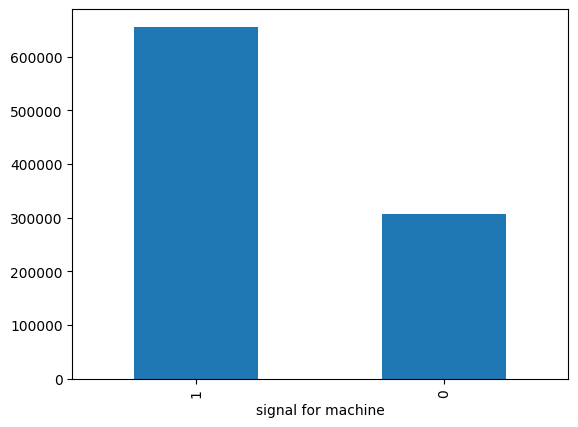

In [23]:
# Check the target value the number of count of bullish and bearish (1,0)
df['signal for machine'].value_counts().plot(kind='bar')

In [24]:
# --> First convert the Object dtype to unicode and then go to train test split


df['twits'] = df['twits'].astype('unicode')

In [25]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(df['twits'], df['signal for machine'], test_size=0.33,random_state=50)

In [26]:
df['twits']

0                                              tatasteel nse
1          tatasteel nse look like fake breakout stay cau...
4          tatasteel nse cmp anoth counter show uptrend r...
7                                 tatasteel nse wit breakout
9          tatasteel nse standalon adjust ebitda inrbn es...
                                 ...                        
1897282                          xom guyana oil boom acceler
1897289                                               xom yr
1897293    vet gush xom klxe interest video report ground...
1897296                                     xom percent year
1897297    xom time buy exxon stock forecast earn outlook...
Name: twits, Length: 963532, dtype: object

In [27]:
print(X_train)

1164290              tsla everyon thank tesla today bull run
719462                                                  tsla
1701958                                   ape amc today ride
15064                                                   nvda
1889971                          xom everyth n market matter
                                 ...                        
907525            vix amzn spi tsla qqq earth consum die sun
1340199                                              mara go
528160                      spi smoke today qqq ba msft yuck
218271     well thank jensen huang ai futur help make hap...
1813431                              pypl go crazi wait long
Name: twits, Length: 645566, dtype: object


In [28]:
#TF-IDF Implementation now
vect = TfidfVectorizer().fit(X_train)

In [38]:
# This converts the words into decimals so the model can understand

X_train_vectorized = vect.transform(X_train)
pd.DataFrame(print(X_train_vectorized))

  (0, 46928)	0.149556927451108
  (0, 46011)	0.33020211707778935
  (0, 45127)	0.4753895148714058
  (0, 44912)	0.3557535215848604
  (0, 38636)	0.40769532967687366
  (0, 14932)	0.47347025413663235
  (0, 6575)	0.35447703023819144
  (1, 46928)	1.0
  (2, 46011)	0.4311316164426121
  (2, 37918)	0.7059295004844451
  (2, 2030)	0.39490375832445596
  (2, 1485)	0.39980006417030745
  (3, 31774)	1.0
  (4, 51282)	0.5598686786298593
  (4, 27906)	0.5441920868081624
  (4, 27713)	0.33907486965149497
  (4, 14938)	0.5248145082936014
  (5, 46928)	0.09300728219350661
  (5, 46382)	0.2565626398887776
  (5, 46124)	0.22788762708652985
  (5, 43162)	0.2106265692471347
  (5, 39181)	0.2600253956122089
  (5, 28957)	0.30514529146882935
  (5, 26632)	0.23711495148130815
  (5, 18982)	0.23427980700805845
  :	:
  (645563, 42270)	0.18961288809378138
  (645563, 41564)	0.44203647755488173
  (645563, 36298)	0.22357875660130647
  (645563, 29880)	0.23358955322220834
  (645563, 3134)	0.44606074584799554
  (645564, 49883)	0.2123987

""


In [33]:
## creating Model using Logistic regression   X_train_vectorized twits(decimals tfidf)     y_train contain (1 and 0)  target data
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
## Can give any test data but first convert it into object into unicode     X_test twits (decimals tfidf)    # we can give any dataset here
## converting into decimals with ifidf

predictions = model.predict(vect.transform(X_test))

In [35]:
print(predictions)

[1 0 1 ... 0 1 1]


In [37]:
# compute AUC value
print("AUC:",roc_auc_score(y_test,predictions))

AUC: 0.7285035038833689


In [32]:
# --> entry that is having 'tatasteel nse' solv it later

df[df['twits']=='tatasteel nse']

,_id,index,twits,signal,stock_name,Date,signal for machine
0,64fed69d201a2a395d192389,0,tatasteel nse,Bullish,TATASTEEL.NSE,2023-07-29T00:00:00.000Z,1
58,64fed69d201a2a395d1923c3,58,tatasteel nse,Bullish,TATASTEEL.NSE,2023-07-18T00:00:00.000Z,1
308,64fed69d201a2a395d1924bd,308,tatasteel nse,Bullish,TATASTEEL.NSE,2023-05-29T00:00:00.000Z,1
492,64fed69d201a2a395d192575,492,tatasteel nse,Bearish,TATASTEEL.NSE,2023-04-20T00:00:00.000Z,0
831,64fed69d201a2a395d1926c8,831,tatasteel nse,Bearish,TATASTEEL.NSE,2023-02-07T00:00:00.000Z,0
914,64fed69d201a2a395d19271b,914,tatasteel nse,Bullish,TATASTEEL.NSE,2023-01-23T00:00:00.000Z,1
944,64fed69d201a2a395d192739,944,tatasteel nse,Bullish,TATASTEEL.NSE,2023-01-18T00:00:00.000Z,1
985,64fed69d201a2a395d192762,985,tatasteel nse,Bullish,TATASTEEL.NSE,2023-01-13T00:00:00.000Z,1
1033,64fed69e201a2a395d192792,33,tatasteel nse,Bullish,TATASTEEL.NSE,2023-01-05T00:00:00.000Z,1
1043,64fed69e201a2a395d19279c,43,tatasteel nse,Bullish,TATASTEEL.NSE,2023-01-04T00:00:00.000Z,1
